<a href="https://colab.research.google.com/github/MidasXIV/Artificial-Intelliegence--Deep-Learning--Tensor-Flow/blob/master/1.%20Linear%20Regression/TF_without_Keras_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### STEP 1 :  Importing Dependencies

In [0]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

### STEP 2 : Set up Training Data

In [0]:
# Formula := y = m * x + b
n_samples = 30
x_train = np.linspace(0,20,n_samples)                   # Generate random values between 0 & 20
# y_train = 3 * x_train + 4 * np.random.randn(n_samples)  # Adding noise to a straight line 
y_train = 3 * x_train + 4                               # Without noise to a straight line 

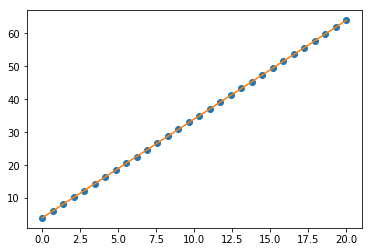

In [43]:
plt.plot(x_train, y_train,'o')      # To plot x_train and y_train
plt.plot(x_train, 3 * x_train + 4)  # Straight line
plt.show()

### STEP 3 : Defining Weights and Baises

In [0]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Initially the Weights and Biases are Random
# They are updated in each epoch based on our Loss and Optimiser Function

W = tf.Variable(np.random.randn(),name='weights')
B = tf.Variable(np.random.randn(),name='bais')

### Step 4 : Defining Loss and Optimizer Functions

$Loss= 1/2n \sum_{i=0}^n (Pred(i) - Y_{i}) ^ 2$

Smiliar to [Mean Squared Error](https://www.researchgate.net/profile/Alexandros_Karatzoglou/publication/221515860/figure/fig1/AS:339586132791298@1457975051470/Mean-Squared-Error-formula-used-to-evaluate-the-user-model.png)

In [0]:
# Pred = X * W + B
Pred = tf.add(tf.multiply(X,W),B)

# Define Loss Function
# Something that the model should reduce.

Loss = tf.reduce_sum((Pred - Y) ** 2) / (2 * n_samples)             # Mean Squared Error
Optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(Loss)   # Learning Rate is 0.1


### Step 5 : Compile , Train Model and Predict

In [0]:
init = tf.global_variables_initializer()

Epoch :: 0000 | Loss :: 0.2666 w = 2.6481 b = 0.6772
Epoch :: 0002 | Loss :: 0.2666 w = 2.6464 b = 0.7128
Epoch :: 0004 | Loss :: 0.2666 w = 2.6447 b = 0.7470
Epoch :: 0006 | Loss :: 0.2665 w = 2.6430 b = 0.7799
Epoch :: 0008 | Loss :: 0.2665 w = 2.6415 b = 0.8115
Epoch :: 0010 | Loss :: 0.2664 w = 2.6400 b = 0.8418
Epoch :: 0012 | Loss :: 0.2664 w = 2.6385 b = 0.8709
Epoch :: 0014 | Loss :: 0.2664 w = 2.6371 b = 0.8989
Epoch :: 0016 | Loss :: 0.2663 w = 2.6358 b = 0.9258
Epoch :: 0018 | Loss :: 0.2663 w = 2.6345 b = 0.9516


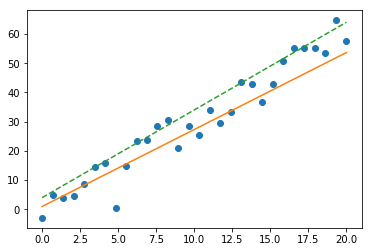

In [33]:
epochs = 20

with tf.Session() as sesh:
  sesh.run(init)
  for epoch in range(epochs):
    for x,y in zip(x_train,y_train):
      sesh.run(Optimizer, feed_dict = {X: x, Y:y})
      
    if not epoch % 2:
      c = sesh.run(Loss, feed_dict = {X: x, Y:y})
      w = sesh.run(W)
      b = sesh.run(B)
      print(f'Epoch :: {epoch:04d} | Loss :: {c:.4f} w = {w:.4f} b = {b:.4f}')
        
  Weight = sesh.run(W)
  Bais   = sesh.run(B)
  
  plt.plot(x_train,y_train,'o')
  plt.plot(x_train, x_train * Weight + Bais , label='New Line')  # New Straight Line
  plt.plot(x_train, 3 * x_train + 4 , linestyle='dashed', label='Org Line')          # Org Straight line
  plt.show()

### EXTRA : Solving the problem using Tensorflow + Keras

This model is tested without having any noise in the straight line.

In [44]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([l0])
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(x_train, y_train, epochs=200, verbose=False)
print("Finished training the model")

Finished training the model


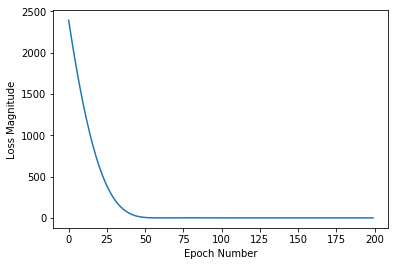

In [45]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [47]:
print(model.predict([6]))
print(6 * 3 + 4)

[[21.961102]]
22


In [48]:
# Shows first Variable is close to 3 and Second is close to 4
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[3.0050516]], dtype=float32), array([3.9307914], dtype=float32)]
